# Doc embeddings and classification

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import sklearn.metrics as met
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from tqdm import tqdm

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import os
import fasttext.util
import nltk
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
from preprocessing.preprocessing import Preprocessor

In [3]:
simple_df = pd.read_csv("simple_data.csv")

In [5]:
preprocessor = Preprocessor()
preprocessor.perform_clean_lemmatize_tokenize(simple_df, "text")

100%|██████████████████████████████████████████████████████████████████████████████████████| 2457/2457 [00:06<00:00, 356.67it/s]


,Unnamed: 0,id,relevant,text,cleaned_text,lemmatized_text,tokens_text
0,0,804124,0,Presented by Facebook To view past editions of...,presented facebook view past editions hills re...,present facebook view past editions hill repor...,"[present, facebook, view, past, editions, hill..."
1,1,554905,0,Having seen both the unedited footage of Presi...,seen unedited footage president donald trumps ...,see unedited footage president donald trump in...,"[see, unedited, footage, president, donald, tr..."
2,2,798375,0,"\n\nJan 05, 2021( Conservative Daily News: htt...",jan conservative daily news delivered newstex ...,jan conservative daily news deliver newstex po...,"[jan, conservative, daily, news, deliver, news..."
3,3,691445,0,As President Donald Trump continued to assert ...,president donald trump continued assert withou...,president donald trump continue assert without...,"[president, donald, trump, continue, assert, w..."
4,4,490404,0,Mike Pence and Kamala Harris do not have a tou...,mike pence kamala harris tough act followthe v...,mike pence kamala harris tough act followthe v...,"[mike, pence, kamala, harris, tough, act, foll..."
...,...,...,...,...,...,...,...
2452,2452,459573,0,(Alliance News) - European nations vowed Wedne...,alliance news european nations vowed wednesday...,alliance news european nations vow wednesday g...,"[alliance, news, european, nations, vow, wedne..."
2453,2453,239653,0,Northeastern University issued the following n...,northeastern university issued following news ...,northeastern university issue follow news meme...,"[northeastern, university, issue, follow, news..."
2454,2454,404080,0,"By Indira Guerrero\n\nNew Delhi, June 21 (EFE)...",indira guerrero new delhi june efe amid corona...,indira guerrero new delhi june efe amid corona...,"[indira, guerrero, new, delhi, june, efe, amid..."
2455,2455,403152,0,While Wieden + Kennedy has spent recent weeks ...,wieden kennedy spent recent weeks launching wo...,wieden kennedy spend recent weeks launch work ...,"[wieden, kennedy, spend, recent, weeks, launch..."


In [6]:
simple_df

,Unnamed: 0,id,relevant,text,cleaned_text,lemmatized_text,tokens_text
0,0,804124,0,Presented by Facebook To view past editions of...,presented facebook view past editions hills re...,present facebook view past editions hill repor...,"[present, facebook, view, past, editions, hill..."
1,1,554905,0,Having seen both the unedited footage of Presi...,seen unedited footage president donald trumps ...,see unedited footage president donald trump in...,"[see, unedited, footage, president, donald, tr..."
2,2,798375,0,"\n\nJan 05, 2021( Conservative Daily News: htt...",jan conservative daily news delivered newstex ...,jan conservative daily news deliver newstex po...,"[jan, conservative, daily, news, deliver, news..."
3,3,691445,0,As President Donald Trump continued to assert ...,president donald trump continued assert withou...,president donald trump continue assert without...,"[president, donald, trump, continue, assert, w..."
4,4,490404,0,Mike Pence and Kamala Harris do not have a tou...,mike pence kamala harris tough act followthe v...,mike pence kamala harris tough act followthe v...,"[mike, pence, kamala, harris, tough, act, foll..."
...,...,...,...,...,...,...,...
2452,2452,459573,0,(Alliance News) - European nations vowed Wedne...,alliance news european nations vowed wednesday...,alliance news european nations vow wednesday g...,"[alliance, news, european, nations, vow, wedne..."
2453,2453,239653,0,Northeastern University issued the following n...,northeastern university issued following news ...,northeastern university issue follow news meme...,"[northeastern, university, issue, follow, news..."
2454,2454,404080,0,"By Indira Guerrero\n\nNew Delhi, June 21 (EFE)...",indira guerrero new delhi june efe amid corona...,indira guerrero new delhi june efe amid corona...,"[indira, guerrero, new, delhi, june, efe, amid..."
2455,2455,403152,0,While Wieden + Kennedy has spent recent weeks ...,wieden kennedy spent recent weeks launching wo...,wieden kennedy spend recent weeks launch work ...,"[wieden, kennedy, spend, recent, weeks, launch..."


In [9]:
for tw in simple_df.tokens_text.sample(frac=0.01):
    print("-" * 110)
    print("-" * 110)
    print(" ".join(tw))

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
abstract new york court find make false statements push trump claim lie rudy giuliani tell effort overturn presidential election result whoppers spread seek undermine confidence pennsylvanias vote new york court highlight first suspend law license thursday giuliani hold infamous four season total landscape news conference falsely assert thousands ballot cast philadelphia name dead voters make courtroom appearance behalf donald trump campaign fever dream proceed hurl wild accusations nationwide cabal democratic mayors plot steal election week later thenpresidents tv attack dog serve guest honor gettysburg hear organize state senate republicans proclaim know crook really give inch take whole country new york state appellate court cite demonstrably false mislead statemen

In [10]:
model = SentenceTransformer('./transformer-model')        

In [12]:
text_embeddings = simple_df.tokens_text.apply(lambda x: model.encode(" ".join(x)))

In [13]:
text_embeddings = np.array(text_embeddings)
embeddings_arr = np.zeros((len(simple_df), len(text_embeddings[0])))

for row, emb in enumerate(text_embeddings):
    embeddings_arr[row, :] = emb

In [14]:
embeddings_arr

array([[-1.25912018e-02, -3.74008901e-02,  3.28760222e-02, ...,
        -6.53776675e-02, -3.27704810e-02,  6.77772405e-05],
       [ 1.63073353e-02, -7.30678290e-02,  1.92324109e-02, ...,
        -4.06441949e-02, -8.31006840e-02,  8.53309706e-02],
       [ 4.16167751e-02, -6.07255772e-02, -1.08397063e-02, ...,
        -5.01431227e-02,  1.74514633e-02,  3.64067219e-02],
       ...,
       [ 4.89426665e-02, -5.21675311e-03, -8.99187848e-03, ...,
        -1.03276879e-01, -5.99133521e-02, -4.06000130e-02],
       [-2.76725665e-02, -9.16539803e-02, -4.41335365e-02, ...,
        -1.57097429e-01, -2.40351893e-02,  1.83800049e-02],
       [-9.97511391e-03, -1.12147652e-01,  5.49885929e-02, ...,
        -1.25146553e-01, -2.76665632e-02,  4.08267453e-02]])

In [15]:
embeddings_arr.shape

(2457, 384)

In [17]:
y = simple_df.pop("relevant")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(embeddings_arr, y, test_size=0.2, shuffle=True, random_state=234)

In [19]:
X_train.shape, y_train.shape

((1965, 384), (1965,))

In [20]:
met.confusion_matrix(y_test, y_test)

array([[442,   0],
       [  0,  50]])

In [21]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

In [24]:
pred.sum()

5

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       442
           1       0.80      0.08      0.15        50

    accuracy                           0.90       492
   macro avg       0.85      0.54      0.55       492
weighted avg       0.89      0.90      0.87       492



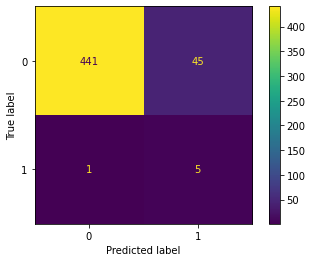

In [73]:
disp = met.ConfusionMatrixDisplay(met.confusion_matrix(pred, y_test))
disp.plot();

In [74]:
lg_clf = LogisticRegression()
lg_clf = lg_clf.fit(X_train, y_train)
pred = lg_clf.predict(X_test)

In [75]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       475
           1       0.24      0.71      0.36        17

    accuracy                           0.91       492
   macro avg       0.61      0.81      0.66       492
weighted avg       0.96      0.91      0.93       492



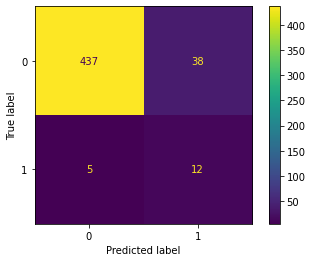

In [76]:
disp = met.ConfusionMatrixDisplay(met.confusion_matrix(pred, y_test))
disp.plot();

In [77]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf = nb_clf.fit(X_train, y_train)
pred = nb_clf.predict(X_test)

In [78]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       410
           1       0.74      0.45      0.56        82

    accuracy                           0.88       492
   macro avg       0.82      0.71      0.75       492
weighted avg       0.87      0.88      0.87       492



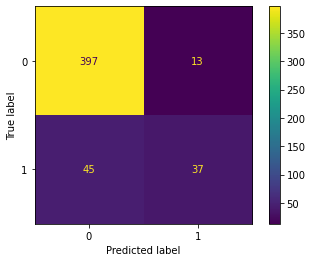

In [79]:
disp = met.ConfusionMatrixDisplay(met.confusion_matrix(pred, y_test))
disp.plot();

##### ----------------------------------------------

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

preprocessor = Preprocessor()
vocabulary = list(set(simple_df['text_words'].explode()) - {np.nan})
tfidf = TfidfVectorizer(vocabulary=vocabulary)
tfidf_tran = tfidf.fit_transform(simple_df['text_words'].apply(lambda x: ' '.join(x)))

[nltk_data] Downloading package stopwords to /Users/kian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
data = tfidf_tran.toarray()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True, random_state=55)

In [89]:
X_train.shape, y_train.shape

((1965, 53231), (1965,))

In [90]:
met.confusion_matrix(y_test, y_test)

array([[442,   0],
       [  0,  50]])

In [91]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       491
           1       0.02      1.00      0.04         1

    accuracy                           0.90       492
   macro avg       0.51      0.95      0.49       492
weighted avg       1.00      0.90      0.95       492



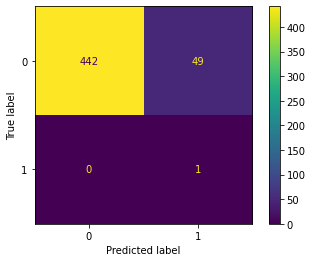

In [92]:
print(classification_report(pred, y_test))
disp = met.ConfusionMatrixDisplay(met.confusion_matrix(pred, y_test))
disp.plot();

In [93]:
lg_clf = LogisticRegression()
lg_clf = lg_clf.fit(X_train, y_train)
pred = lg_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       482
           1       0.14      0.70      0.23        10

    accuracy                           0.91       492
   macro avg       0.57      0.81      0.59       492
weighted avg       0.98      0.91      0.94       492



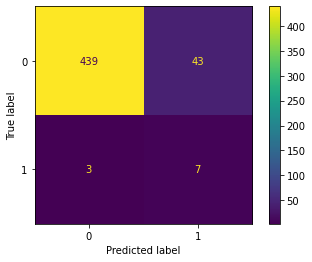

In [94]:
print(classification_report(pred, y_test))
disp = met.ConfusionMatrixDisplay(met.confusion_matrix(pred, y_test))
disp.plot();

## --------------------------------------------------------------------

In [135]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=2)
kmeans.fit(embeddings_arr)
y_kmeans = kmeans.labels_

In [143]:
y_kmeans_str = pd.Series(y_kmeans).apply(lambda x: "Relevant doc" if x else "Not-Relevant doc")
y_real_str = pd.Series(y).apply(lambda x: "Relevant doc" if x else "Not-Relevant doc")

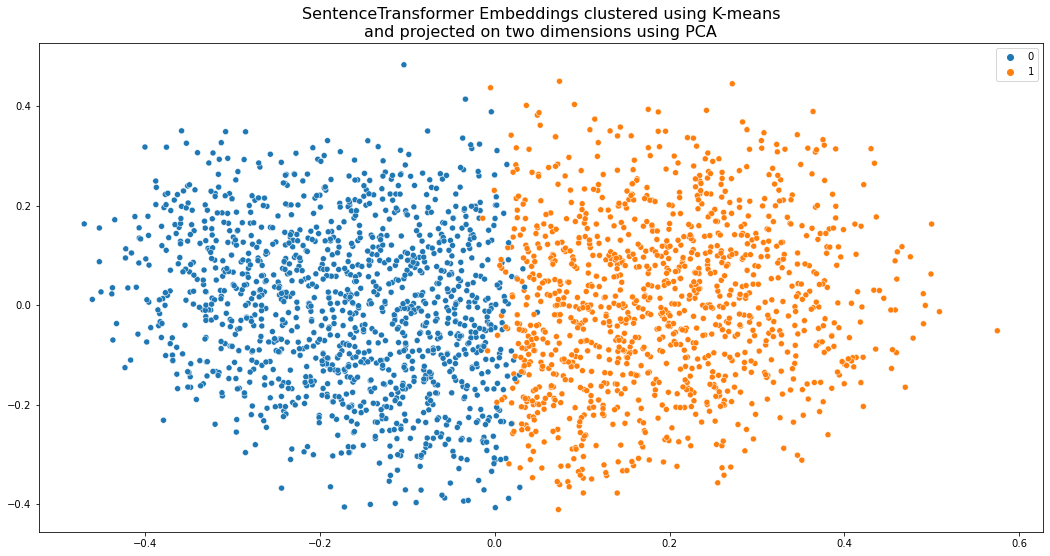

In [146]:
pca = PCA(n_components=2).fit_transform(embeddings_arr)
plt.figure(figsize=(18, 9))
sns.scatterplot(pca[:, 0], pca[:, 1], hue=y_kmeans);
plt.title("SentenceTransformer Embeddings clustered using K-means\nand projected on two dimensions using PCA", fontsize=16);